<a href="https://colab.research.google.com/github/Arush0113/ArushTensorflowRepo/blob/main/Arush_linecraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
df = pd.read_csv('/content/drive/MyDrive/air_quality.csv', delimiter = ',')

In [22]:
df.head()

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013,3,1,0,4.0,-0.7,1023.0,0.0,NNW,4.4
1,2013,3,1,1,8.0,-1.1,1023.2,0.0,N,4.7
2,2013,3,1,2,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013,3,1,3,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013,3,1,4,3.0,-2.0,1025.2,0.0,N,2.0


In [23]:
wind_directions = df['wind_direction'].unique()

In [24]:
new_df = df.copy()

In [25]:
new_df.drop(['wind_direction'], axis = 1, inplace=True)

In [26]:
# new_df['pressure'] = new_df['pressure']/new_df['pressure'].mean()
# new_df['wind_speed'] = new_df['wind_speed']/new_df['wind_speed'].mean()
# new_df['temperature'] = new_df['temperature']/new_df['temperature'].mean()
# new_df['rain'] = new_df['rain']/new_df['rain'].mean()

In [27]:
pred_df = new_df[new_df['PM2.5'] == -1.0]
new_df = new_df[new_df['PM2.5'] != -1.0]

new_df.dropna(inplace=True)
y_df = new_df['PM2.5']
new_df.drop(['PM2.5'], axis = 1, inplace = True)


pred_df.dropna(inplace=True)
ypred_df = pred_df['PM2.5']
pred_df.drop(['PM2.5'], axis = 1, inplace = True)

In [28]:
# pred_df

In [29]:
# new_df['PM2.5'].dtype

In [30]:
new_df['rain'].unique()

array([ 0. ,  0.1,  0.4,  0.9,  0.2,  0.7,  1.4,  1.8,  1.5,  1.3,  1. ,
        1.6,  2.5,  1.9,  1.1,  0.3,  0.8,  0.5,  0.6,  1.2, 10.7,  3.3,
        2.2,  7.6,  8.9,  3.2,  2.1,  3.8,  3.6,  4. , 16. ,  5.7, 11.7,
       21. , 10.1,  6.4,  2.4,  1.7,  2. ,  4.4, 12.1,  6.6,  2.8, 11.2,
        3. ,  4.1,  3.1,  9.8,  8.8,  4.5, 14.7,  2.3, 10.6,  2.9,  6. ,
       72.5,  6.8,  3.9,  8.6, 10.9,  3.5,  7. ,  7.3, 11.5, 11.6,  8.2,
        5.4,  4.6,  7.8, 14.6, 40.7,  7.5, 23.6, 23.3,  6.5,  6.1, 26.8,
        8. ,  5.2,  3.4,  2.6, 11.3, 12.9, 13.6,  3.7,  4.7,  4.2,  5. ,
        2.7,  9.9,  4.8,  5.3,  9.6, 33.7, 15.4,  9.5, 29.3,  7.9,  7.2,
       17.8, 33.1,  6.9,  5.9,  4.3, 36.6, 13.4,  6.3,  4.9, 17.9,  7.1,
       13.8, 23.7, 24.1, 20.3, 20.2,  9. , 16.4, 17.7, 18.3, 17.6, 15.3,
        5.5, 21.7, 46.4])

In [31]:
X = np.array(new_df)
y = np.array(y_df)

In [49]:
X_train = X[:0.8*X.shape[0], :]
X_test = X[0.8*X.shape[0]:, :]

y_train = y[:0.8*X.shape[0], :]
y_test = y[0.8*X.shape[0]:, :]

TypeError: ignored

In [32]:
X.shape
# y.shape

(31516, 8)

In [33]:
# for item in wind_directions:
#   print(item)

In [34]:
# data = np.array(new_df)

In [35]:
# data.shape

In [36]:
# X = data[:, :3]
# y = data[:, 4]

In [37]:
print(X.shape)
print(y.shape)

(31516, 8)
(31516,)


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

In [42]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(32, activation = 'relu', kernel_initializer='random_normal'),
                                    tf.keras.layers.Dense(16, activation = 'relu', kernel_initializer='random_normal'),
                                    tf.keras.layers.Dense(8, activation = 'relu', kernel_initializer='random_normal'),
                                    tf.keras.layers.Dense(1),
])

In [43]:
model.compile(loss = "mae", optimizer = 'adam')
history = model.fit(X, y, epochs = 15, verbose = 1)

Epoch 1/15
985/985 [==============================] - 2s 2ms/step - loss: 56.5642
Epoch 2/15
985/985 [==============================] - 2s 2ms/step - loss: 55.8421
Epoch 3/15
985/985 [==============================] - 2s 2ms/step - loss: 55.7855
Epoch 4/15
985/985 [==============================] - 2s 2ms/step - loss: 55.6884
Epoch 5/15
985/985 [==============================] - 2s 2ms/step - loss: 55.5244
Epoch 6/15
985/985 [==============================] - 2s 2ms/step - loss: 55.2154
Epoch 7/15
985/985 [==============================] - 2s 2ms/step - loss: 54.6655
Epoch 8/15
985/985 [==============================] - 2s 2ms/step - loss: 53.9542
Epoch 9/15
985/985 [==============================] - 2s 2ms/step - loss: 53.3939
Epoch 10/15
985/985 [==============================] - 2s 2ms/step - loss: 53.1144
Epoch 11/15
985/985 [==============================] - 2s 2ms/step - loss: 52.9497
Epoch 12/15
985/985 [==============================] - 2s 2ms/step - loss: 52.7687
Epoch 13/15
9

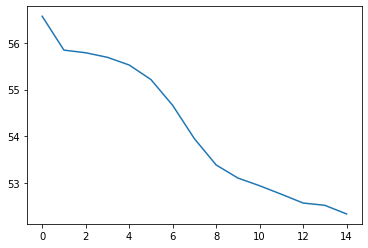

In [44]:
plt.figure()
plt.plot(history.history['loss'])

In [45]:
X_pred = np.array(pred_df)
y_pred = np.array(ypred_df)


In [46]:
model.predict(X_pred)

AttributeError: ignored

In [ ]:
pred_df['PM2.5'] = lst

In [ ]:
pred_df

In [ ]:
pred_df.to_csv(r'/content/drive/MyDrive/Arush_predictions.csv')